In [1]:
import networkx as nx
import pandas as pd
from sklearn.decomposition import PCA
from ge.models import DeepWalk
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

D:\python\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
In D:\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and wi

In [2]:
#读取文件，并将数据转化为图形数据
df = pd.read_csv('./seealsology-data.tsv',sep='\t')
G = nx.from_pandas_edgelist(df,'source','target',edge_attr=True,create_using=nx.Graph())


In [3]:
# 初始化DeepWalk模型，步长为10，每个节点走5词
model = DeepWalk(G, walk_length=10, num_walks=5, workers=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [4]:
# 模型训练
model.train(window_size=4, iter=20)

Learning embedding vectors...
Learning embedding vectors done!


In [5]:
# 得到节点的embedding
embeddings = model.get_embeddings()

In [6]:
#获取与critical illness insurance最相近的节点
print('Most similar:',model.w2v_model.similar_by_word('critical illness insurance'))


Most similar: [('total permanent disability insurance', 0.8713207840919495), ('rand health insurance experiment', 0.6591272354125977), ('pet insurance', 0.6554669141769409), ("servicemembers' group life insurance", 0.6531447172164917), ('return of premium life insurance', 0.6527805328369141), ('whole life insurance', 0.6378165483474731), ('anicom', 0.6322779655456543), ('tontine', 0.6274062395095825), ('life insurance', 0.6238973140716553), ('health maintenance organization', 0.6232577562332153)]


In [7]:
# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
    # 每个节点的embedding为100维
    X = []
    for item in word_list:
        X.append(embeddings[item])

    #print(X.shape)
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(list(word_list)):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()

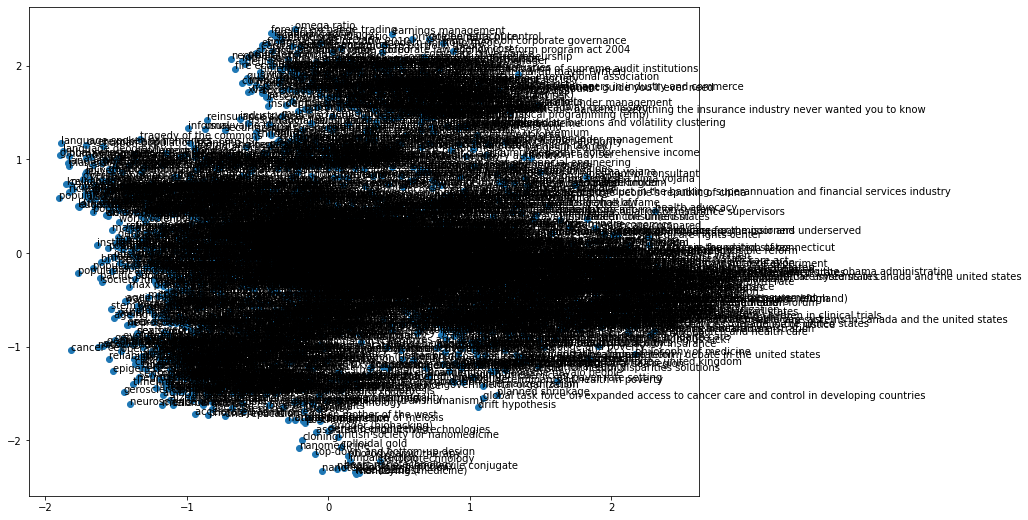

In [8]:
#绘制节点向量
plot_nodes(model.w2v_model.wv.vocab)